In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline


In [37]:
# df_scorecard = pd.read_csv('data/Most-Recent-Cohorts-Institution.csv')
# df_scorecard.head()

In [38]:
df_social_capital = pd.read_csv('data/social_capital_college.csv')
df_social_capital.head()

,college,college_name,zip,county,mean_students_per_cohort,ec_own_ses_college,ec_own_ses_se_college,ec_parent_ses_college,ec_parent_ses_se_college,ec_high_own_ses_college,...,ec_high_parent_ses_se_college,exposure_own_ses_college,exposure_parent_ses_college,bias_own_ses_college,bias_parent_ses_college,bias_high_own_ses_college,bias_high_parent_ses_college,clustering_college,support_ratio_college,volunteering_rate_college
0,100200,Alabama A & M University,35762,1089,943.666667,0.85678,0.02233,0.67629,0.03241,1.12202,...,0.03498,0.84662,0.65090,-0.01200,-0.03900,-0.32529,-0.14036,0.24470,0.99483,0.03256
1,100300,Faulkner University,36109,1101,227.666667,1.30964,0.04869,1.26671,0.05812,1.54639,...,0.05134,1.23776,1.20183,-0.05807,-0.05398,-0.24935,-0.12001,0.40754,0.99481,0.03336
2,100400,University of Montevallo,35115,1117,494.000000,1.42378,0.03040,1.15413,0.03638,1.57365,...,0.03395,1.41664,1.17101,-0.00504,0.01442,-0.11083,-0.05979,0.30921,0.99683,0.09566
3,100500,Alabama State University,36104,1101,NaN,0.77916,0.01937,0.67090,0.03038,1.04811,...,0.03201,0.75162,0.65297,-0.03664,-0.02747,-0.39448,-0.12802,0.23222,0.99485,0.02150
4,100700,Central Alabama Community College,35010,1123,NaN,0.72742,0.03504,0.77238,0.04497,0.98888,...,0.04984,0.76579,0.76786,0.05010,-0.00589,-0.29133,-0.13139,0.34104,0.99271,0.02922


In [39]:
df_social_capital.shape

(2586, 22)

In [40]:
df_social_capital.isnull().sum()

college                            0
college_name                       0
zip                                0
county                             0
mean_students_per_cohort         489
ec_own_ses_college               224
ec_own_ses_se_college            224
ec_parent_ses_college            394
ec_parent_ses_se_college         394
ec_high_own_ses_college          224
ec_high_own_ses_se_college       224
ec_high_parent_ses_college       394
ec_high_parent_ses_se_college    394
exposure_own_ses_college         224
exposure_parent_ses_college      394
bias_own_ses_college             224
bias_parent_ses_college          394
bias_high_own_ses_college        224
bias_high_parent_ses_college     394
clustering_college                 0
support_ratio_college              0
volunteering_rate_college          1
dtype: int64

In [41]:
df_college = pd.read_csv('data/college_v2.csv')
df_college.head()

,instnm,city,stabbr,zip,latitude,longitude,adm_rate,sat_mid_read,sat_mid_math,act_mid_cumulative,...,v_hisp_share_fall_2000,v_pct_arthuman_2000,v_pct_business_2000,v_pct_health_2000,v_pct_multidisci_2000,v_pct_publicsocial_2000,v_pct_stem_2000,v_pct_socialscience_2000,v_pct_tradepersonal_2000,_merge
0,A Better U Beauty Barber Academy,Albuquerque,NM,87110,35.110630,-106.583765,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master only (1)
1,A T Still University of Health Sciences,Kirksville,MO,63501,40.193648,-92.589183,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master only (1)
2,ABC Adult School,Cerritos,CA,90703-2801,33.878179,-118.070114,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master only (1)
3,ABC Adult School - Cabrillo Lane,Cerritos,CA,90703-7748,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master only (1)
4,ABC Beauty Academy,Richardson,TX,75081,32.931698,-96.685333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master only (1)


In [42]:
df_college.columns

Index(['instnm', 'city', 'stabbr', 'zip', 'latitude', 'longitude', 'adm_rate',
       'sat_mid_read', 'sat_mid_math', 'act_mid_cumulative', 'act_mid_english',
       'act_mid_math', 'act_mid_writing', 'sat_avg', 'ug_enrol',
       'nprice_pub_cat1', 'nprice_pub_cat2', 'nprice_pub_cat3',
       'nprice_pub_cat4', 'nprice_pub_cat5', 'nprice_pvt_cat1',
       'nprice_pvt_cat2', 'nprice_pvt_cat3', 'nprice_pvt_cat4',
       'nprice_pvt_cat5', 'avg_cost_attendance', 'completion_rate',
       'grad_debt_median', 'grad_debt_med_LY', 'grad_debt_med_MY',
       'grad_debt_med_HY', 'female', 'married', 'avg_familyincome',
       'median_householdincome', 'median_earn_aftr6yr', 'number_gradstudent',
       'zipcode', 'own_sc_low', 'parent_sc_low', 'own_sc_high',
       'parent_sc_high', 'merge1', 'state', 'county', 'v_tier',
       'v_ipeds_enrollment_2013', 'v_sticker_price_2013', 'v_sat_avg_2013',
       'v_scorecard_netprice_2013', 'v_black_share_fall_2000',
       'v_hisp_share_fall_2000', 'v_

In [43]:
features = ['instnm', 'city', 'stabbr', 'own_sc_low', 'parent_sc_low', 'own_sc_high', 'parent_sc_high']

df_sc = df_college[features]

In [44]:
df_sc.isnull().sum()

instnm               0
city              1142
stabbr            1142
own_sc_low        5491
parent_sc_low     5655
own_sc_high       5491
parent_sc_high    5655
dtype: int64

In [45]:
df_sc = df_sc.dropna()

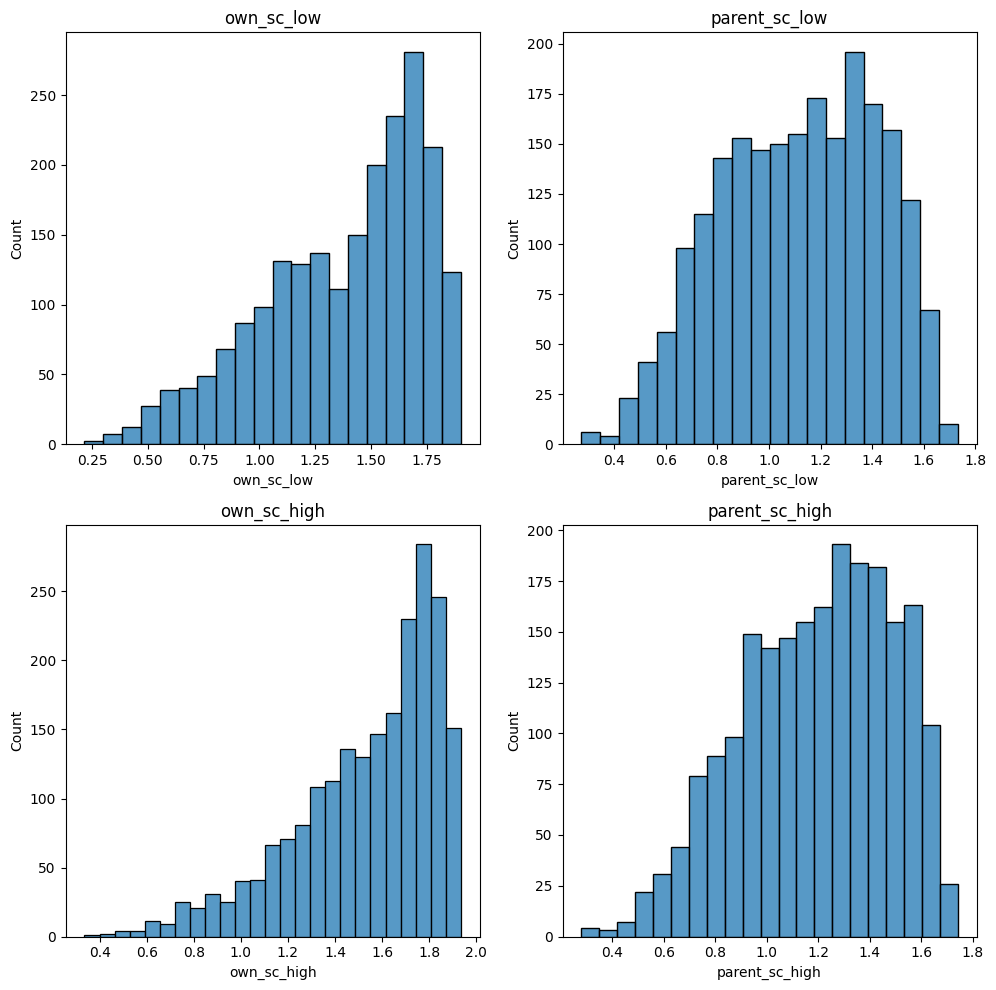

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for col, ax in zip(df_sc[['own_sc_low', 'parent_sc_low', 'own_sc_high', 'parent_sc_high']], axes.flatten()):
    sns.histplot(df_sc[col], kde=False, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [53]:
# Create a ranking of the colleges based on the social capital score
df_sc['sc_total'] = df_sc['own_sc_low'] + df_sc['parent_sc_low'] + df_sc['own_sc_high'] + df_sc['parent_sc_high']

# Create a ranking of the colleges based on sc_total
df_sc['sc_rank'] = df_sc['sc_total'].rank(ascending=False)

In [54]:
with open('data/sc_test.csv', 'w') as f:
    df_sc.to_csv(f, index=False)